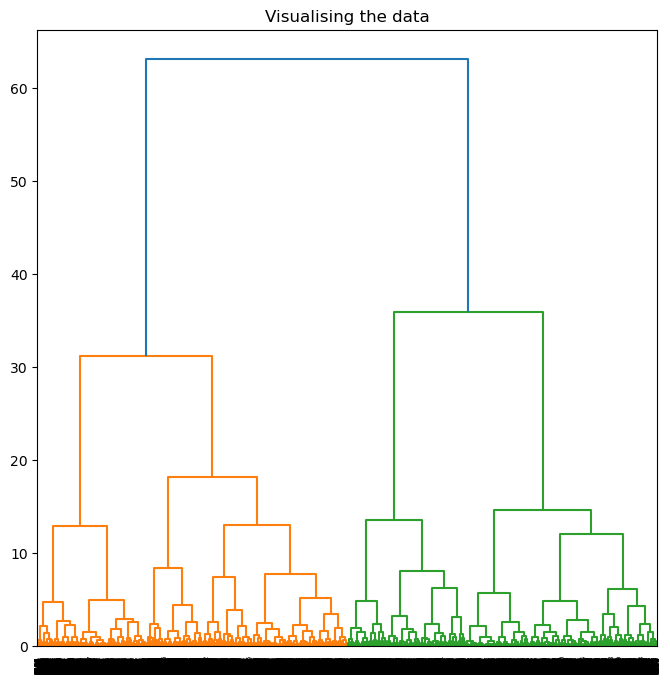

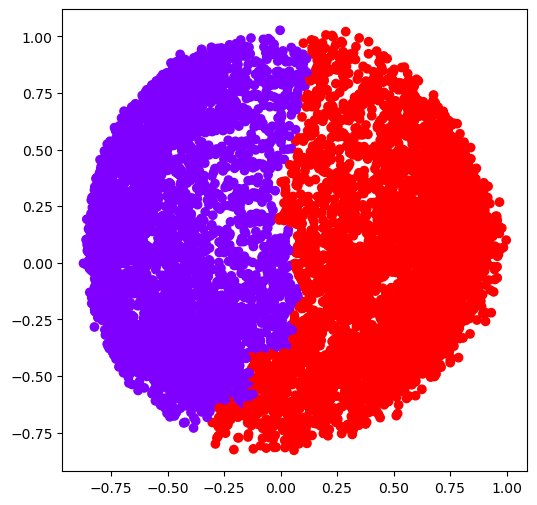

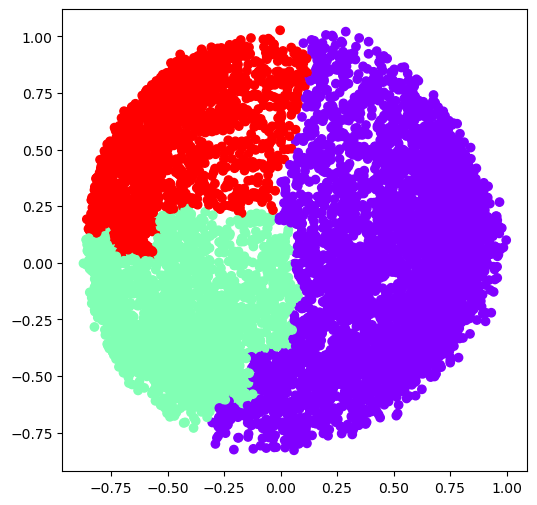

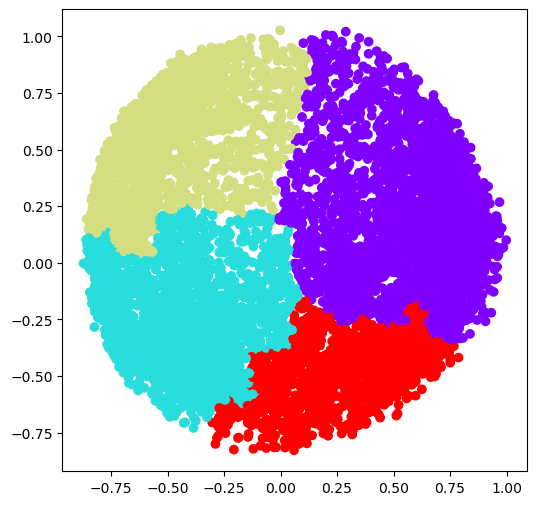

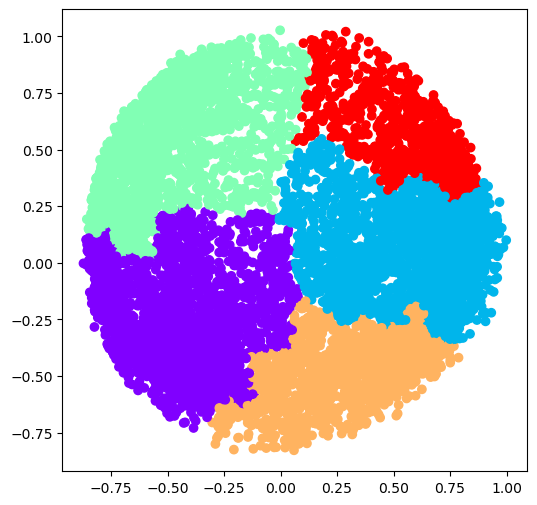

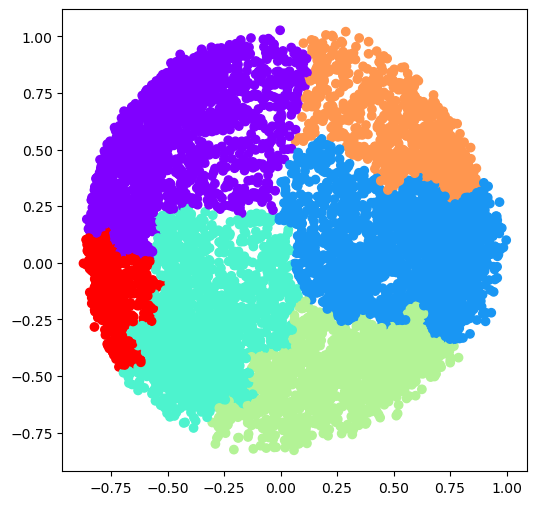

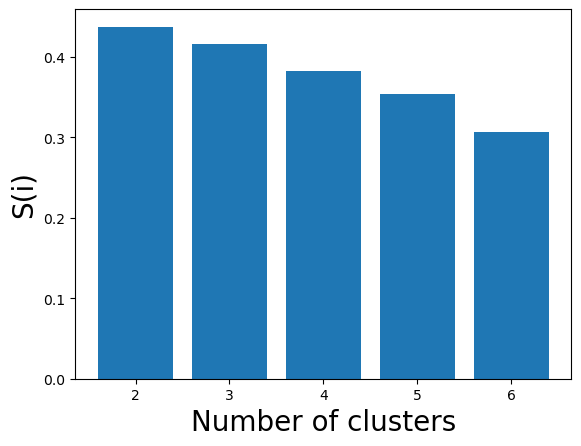

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
# Step 2: Loading and Cleaning the data
# Changing the working location to the location of the file
# cd C:\Users\Dev\Desktop\Kaggle\Credit_Card
X = pd.read_csv('CC GENERAL.csv')
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1)
# Handling the missing values
X.fillna(method ='ffill', inplace = True)
# Step 3: Preprocessing the data
# Scaling the data so that all the features become comparable 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Normalizing the data so that the data approximately # follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)
# Step 4: Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
# Dendrograms are used to divide a given cluster into many different clusters. Step 5: Visualizing the working of the Dendrograms
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
# Step 6: Building and Visualizing the different clustering models for different values of k a) k = 2
ac2 = AgglomerativeClustering(n_clusters = 2) 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
  c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],
  c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],
  c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],
  c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],
  c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()
#Step 7: Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6]
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append(
silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append(
silhouette_score(X_principal, ac6.fit_predict(X_principal)))
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()